# Regressão Linear

Regressão Linear tem origem na estatística. É uma equação para se estimar o valor esperado de uma variável Y com base nos valores de outras variáveis x.

![reglinear](../images/reg.png)

## Os dados

Voltando ao dataset do Fifa 19.

Esses dados podem ser [encontrados no Kaggle](https://www.kaggle.com/karangadiya/fifa19). 

![fifa](../images/fifa.jpeg)

Nesta aula, usaremos a biblioteca ScikitLearn e o modelo de regressão linear para tentar prever os valores da coluna "Overall".

In [1]:
#Lendo os dados
import pandas as pd
pd.set_option('display.max_columns',200)
data = pd.read_csv('../data/data.csv', index_col = 0)

#Arrumando algumas variáveis numéricas:
def convert_currency(col):
    return (col.str.lstrip('€')
               .str.rstrip('.')
               .str.replace('K','000')
               .str.replace('M','000000')
               .astype('float'))

data['Value'] = convert_currency(data.Value)
data['Wage'] = convert_currency(data.Wage)
data['Weight'] = data.Weight.str.rstrip('lbs').astype('float')

#Filtrando variáveis numéricas
data_numeric = data[['Age', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weight',
               'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'GKPositioning',
                'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure',
                'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                'GKKicking','GKReflexes', 'Overall']]

In [2]:
data_numeric.head(5)

,Age,Potential,Value,Wage,Special,International Reputation,Weight,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,GKPositioning,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKReflexes,Overall
0,31,94,110.5,565000.0,2202,5.0,159.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,14.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,8.0,94
1,33,94,77000000.0,405000.0,2228,5.0,183.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,14.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,11.0,94
2,26,93,118.5,290000.0,2143,5.0,150.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,15.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,11.0,92
3,27,93,72000000.0,260000.0,1471,4.0,168.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,88.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,94.0,91
4,27,92,102000000.0,355000.0,2281,4.0,154.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,10.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,13.0,91


## Passo 1: estimar com base na coluna 'Value'

Se usássemos somente a idade do jogador para estimar o overall, como seria?

### Vamos dar uma olhada rápida da distribuição dessa variável...

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = data, x = 'Value', y = 'Overall')

### Precisamos dividir algumas coisas:

1. Precisamos dividir o que é característica (x) do que é o valor a ser predito (y)
2. Também precisamos dividir o que vai ser usado para treinar o modelo e o que vai ser usado para verificar a performance do modelo.

In [4]:
from sklearn.model_selection import train_test_split

# Dividindo x e y
x = data_numeric.Value.values
y = data_numeric.Overall.values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

![train_test_split](../images/train_test.png)

### Agora sim podemos treinar o modelo:

In [5]:
from sklearn.linear_model import LinearRegression

# Treinando o modelo
model = LinearRegression().fit(x_train.reshape(-1,1), y_train)

In [6]:
# Fazendo as previsões
y_pred = model.predict(x_test.reshape(-1,1))

/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


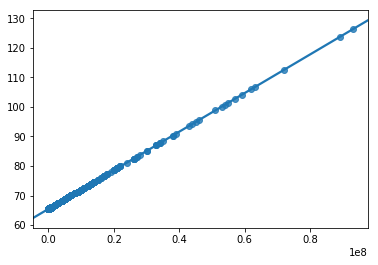

In [7]:
# Vamos ver a reta das previsões feitas:
sns.regplot(x = x_test, y = y_pred)

In [8]:
model.intercept_

65.45734270613055

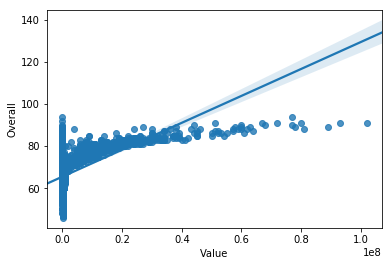

In [9]:
sns.regplot(data = data, x = 'Value', y = 'Overall')

### Avaliando o modelo

In [10]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

39.86152945210835

## Passo 2: estime com base na coluna 'Age'


In [15]:
# Dividindo x e y

# Dividindo dados para treino e dados para teste

# Treinando o modelo

# Fazendo as previsões

# Avaliando o modelo


## Passo 3: faça o mesmo para a coluna 'Weight'

In [12]:
# Dividindo x e y
x = data_numeric.Weight.fillna(data_numeric.Weight.mean()).values

# Dividindo dados para treino e dados para teste
# [coloque o codigo aqui]

# Treinando o modelo
# [coloque o codigo aqui]

# Fazendo as previsões
# [coloque o codigo aqui]

# Avaliando o modelo
# [coloque o codigo aqui]

## Passo 4: Agora com todas as variáveis numéricas

In [13]:
x = data_numeric.fillna(data_numeric.mean()).values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Treinando o modelo
model = LinearRegression().fit(x_train, y_train)

# Fazendo as previsões
y_pred = model.predict(x_test)

# Avaliando o modelo
mean_squared_error(y_test, y_pred)

3.187732822269465e-23

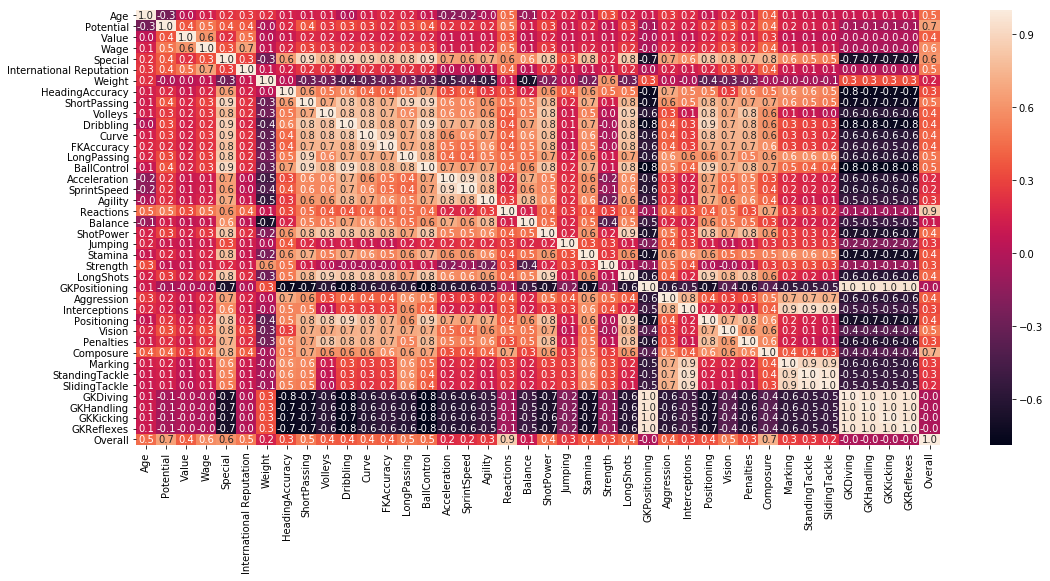

In [14]:
plt.figure(figsize=(18,8))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".1f");